
Autor: Juan Carlos González (jgonzalezjo)

# Ensembles: Combinación de clasificadores

En esta práctica veremos diferentes métodos de combinación de clasificadores aplicados sobre el conjunto de datos [EMNIST](https://www.nist.gov/itl/iad/image-group/emnist-dataset).

<ol start="0">
  <li>Carga de datos</li>
  <li>Combinación paralela de clasificadores base similares
  <br>1.1 Bagging
  <br>. 1.1.1 Random Forest simple
  <br>. 1.1.2 Out-of-bag
  <br>. 1.1.3 Probabilidad por clase
  <br>. 1.1.4 Importancia de las variables
  <br>. 1.1.5 Número de clasificadores
  <br>. 1.1.6 Volumen de datos
  <br>1.2 Boosting</li>
  <li>Combinación secuencial de clasificadores base diferentes
  <br>2.1 Stacking
  <br>2.2 Cascading
  <br>. 2.2.1 Cascading simple
  <br>. 2.2.2 Cascading con variables adicionales</li>
</ol>

**Importante: Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html donde se vea el código y los resultados y comentarios de cada ejercicio. Para exportar el notebook a html puede hacerse desde el menú File $\to$ Download as $\to$ HTML.**

In [1]:
# 0. Carga de datos

Usaremos los mismos datos que en la práctica anterior, PEC 3, que son las 5.000 imágenes EMMNIST, correspondientes a 5 carácteres distintos: "A", "B", "C", "D" y "E.

El siguiente código cargará las imágenes:

In [1]:
import pickle
import numpy as np

with open("data.pickle", "rb") as f:
    data = pickle.load(f)
    
images = data["images"]
labels = data["labels"]
n_classes = 5
labels_text = ["A", "B", "C", "D", "E"]

print("Dimensiones del vector de imágenes: {}".format(images.shape))
print("Dimensiones del vector de etiquetas: {}".format(labels.shape))

Dimensiones del vector de imágenes: (5000, 784)
Dimensiones del vector de etiquetas: (5000,)


Con el siguiente código podemos ver un ejemplo de imagen de cada una de las clases. Para ello reajustamos el vector de 784 dimensiones que representa cada imagen en una matriz de tamaño 28x28 y la transponemos para mostrarla:

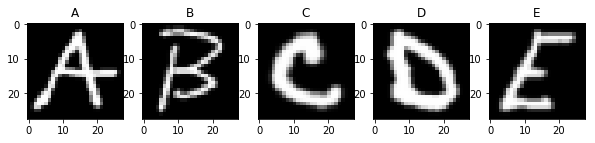

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, n_classes, figsize=(10,10))

idxs = [np.where(labels == i)[0] for i in range(n_classes)]

for i in range(n_classes):
    k = np.random.choice(idxs[i])
    ax[i].imshow(images[k].reshape(28, 28).transpose(), cmap="gray")
    ax[i].set_title("{}".format(labels_text[i]))

Reducimos dimensionalidad usando PCA y dividimos los datos, tal como en el PEC3, en 4000 imágenes entrenamiento y 1000 imágenes para test.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=2017, stratify=labels)

pca = PCA(n_components=100, random_state=2017)
pca_fit = pca.fit(X_train)
X_train_pca = pca_fit.transform(X_train)
X_test_pca = pca_fit.transform(X_test)

def proporcion_etiquetas(y):
    _, count = np.unique(y, return_counts=True)
    return np.true_divide(count, y.shape[0])
    

print("Número de imágenes para entrenar: {}".format(X_train_pca.shape[0]))
print("Número de imágenes para test: {}".format(X_test_pca.shape[0]))

print("Proporción de las etiquetas en el conjunto original: {}".format(proporcion_etiquetas(labels)))
print("Proporción de las etiquetas en el conjunto de entrenamiento: {}".format(proporcion_etiquetas(y_train)))
print("Proporción de las etiquetas en el conjunto de test: {}".format(proporcion_etiquetas(y_test)))

Número de imágenes para entrenar: 4000
Número de imágenes para test: 1000
Proporción de las etiquetas en el conjunto original: [ 0.2  0.2  0.2  0.2  0.2]
Proporción de las etiquetas en el conjunto de entrenamiento: [ 0.2  0.2  0.2  0.2  0.2]
Proporción de las etiquetas en el conjunto de test: [ 0.2  0.2  0.2  0.2  0.2]


# 1. Combinación paralela de clasificadores base similares

## 1.1 Bagging

### 1.1.1 Random forest simple (1 punto)

La idea básica del *bagging* es utilizar el conjunto de entrenamiento original para generar centenares o miles de conjuntos similares usando muestreo con reemplazo. En este concepto está basado el algoritmo *Random Forest*, la combinación de varios árboles de decisión, cada uno entrenado con una realización diferente de los datos. La decisión final del clasificador combinado (la *Random Forest*) se toma por mayoría, dando el mismo peso a todas las decisiones parciales tomadas por los clasificadores base (los árboles).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Usando los conjuntos *X_train_pca* e *y_train_pca*, entrenar un modelo *Random Forest* con 100 árboles de decisión y estimar la precisión del modelo con una estrategia de *cross-validation* en los mismos conjuntos.
<hr>
Sugerencia: usar los módulos *RandomForestClassifier* y *cross_val_score* de sklearn. Para aprender más sobre *cross validation* y sobre como usar estes módulos, os recomendamos los siguientes enlaces:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
http://scikit-learn.org/stable/modules/cross_validation.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
</div>

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf=RandomForestClassifier(n_estimators=100,verbose=0,n_jobs=-1)
print(clf)

# CV con 10 Folds
puntuaciones=cross_val_score(clf,X_train_pca,y_train,cv=10)

print(puntuaciones)
print ("Precisión modelo :", np.mean(puntuaciones))



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
[ 0.915   0.9375  0.9225  0.9225  0.95    0.91    0.9175  0.9325  0.9225
  0.95  ]
Precisión modelo : 0.928


### 1.1.2 Out-of-bag (1 punto)

Una ventaja del *bagging* usado en el *Random Forest* es que cada uno de los árboles de decisión ha sido entrenado con una combinación diferente de los datos (muestreo con reemplazo), o sea que cada uno de los árboles no ha visto una determinada parte de los datos originales. Esto define una especie de conjunto de test para cada uno de los árboles, llamado *out-of-bag*, que puede ser usado para estimar el error del modelo sin necesidad de usar el conjunto de test real que creamos previamente, ni de usar estrategias de *cross-validation*.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Usando los conjuntos *X_train_pca* e *y_train_pca*, entrenar un modelo Random Forest con 100 árboles de decisión. Mostrar la precisión de este modelo en el *out-of-bag* y en el conjunto *X_test_pca*.
<hr>
Sugerencia: usar el módulo *RandomForestClassifier* de sklearn. Para aprender más sobre *out-of-bag* y sobre como usar este módulo (incluyendo el atributo *oob&#95;score_*), os recomendamos los siguientes enlaces:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
</div>

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100,oob_score=True,verbose=0,n_jobs=-1)

clf.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> La precisión obtenida en el *out-of-bag* y en el conjunto de test son comparables? Era de esperar? 
</div>

In [58]:
from sklearn.metrics import accuracy_score

# predicción del modelo clf
outlabels=clf.predict(X_test_pca)

# precisión 
precision=accuracy_score(y_test,outlabels)

print("Precisión modelo out of bag :",clf.oob_score_)
print("Precisión conjunto test: ",precision)


Precisión modelo out of bag : 0.90425
Precisión conjunto test:  0.915


Comparando las precisiónes del clasificador combinado son muy similares como era de esperar. El out of bag nos da el promedio de todos los errores parciales de cada arbol caso de RF, para los elementos no usados del conjunto de entrenamiento al construirlo. No sería necesario separar los datos de entrada en training y test para estimar el modelo con cierta precisión usando puntuación obb, aunque si se puede disponer de un conjunto de test siempre se afinará mejor la precisión del modelo.

### 1.1.3 Probabilidad por clase (1 punto)

Otra ventaja del *bagging* usado en el *Random Forest* es que cada uno de los árboles de decisión, entrenado con una combinación diferente de los datos, puede obtener un resultado diferente. En los problemas de clasificación, el resultado de cada árbol se considera como un voto diferente, y la predicción final del modelo es la clase que haya obtenido más votos teniendo en cuenta todos los árboles.

Estos votos individuales de los árboles también se pueden usar para estimar la probabilidad con la que el modelo prevé cada una de las clases, siendo la probabilidad para cada clase igual al número de votos obtenidos para aquella clase dividido entre el número de árboles.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Para cada clase (etiqueta), muestra un ejemplo de imágen que el modelo haya clasificado incorrectamente junto con la etiqueta asignada por el modelo y la etiqueta original. Muestra también las probabilidades que el modelo ha atribuído a cada clase para estas imágenes.
<hr> Sugerencia: usa el modelo que entrenaste en el ejercicio anterior con el módulo *RandomForestClassifier* de sklearn y las previsiones que calculaste para el conjunto de datos de test. Para mostrar las imágenes, usa el código proporcionado en la sección 0. Para aprender más sobre el módulo *RandomForestClassifier* de sklearn (incluyendo el método *predict_proba*), os recomendamos el siguiente enlace:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
</div>

Matriz de confusión
[[192   2   1   2   3]
 [ 11 169   1  11   8]
 [  3   1 191   1   4]
 [  3   4   1 191   1]
 [  2   7   3   1 187]]

Fallo=1, Original=E, Predecida=B, Probabilidad por etiquetas=[ 0.09  0.38  0.09  0.12  0.32]
Fallo=2, Original=B, Predecida=A, Probabilidad por etiquetas=[ 0.51  0.11  0.09  0.14  0.15]
Fallo=3, Original=D, Predecida=B, Probabilidad por etiquetas=[ 0.11  0.26  0.19  0.24  0.2 ]
Fallo=4, Original=D, Predecida=E, Probabilidad por etiquetas=[ 0.16  0.23  0.12  0.18  0.31]
Fallo=5, Original=B, Predecida=D, Probabilidad por etiquetas=[ 0.1   0.33  0.09  0.35  0.13]
Fallo=6, Original=D, Predecida=A, Probabilidad por etiquetas=[ 0.27  0.17  0.18  0.26  0.12]
Fallo=7, Original=A, Predecida=D, Probabilidad por etiquetas=[ 0.2   0.22  0.06  0.45  0.07]
Fallo=8, Original=B, Predecida=A, Probabilidad por etiquetas=[ 0.37  0.21  0.18  0.12  0.12]
Fallo=9, Original=B, Predecida=D, Probabilidad por etiquetas=[ 0.16  0.27  0.08  0.37  0.12]
Fallo=10, Original=E, Pred

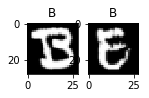

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


# Calcular las probabilidades atribuidas por clase
probabilidades=clf.predict_proba(X_test_pca)


# Matriz de confusión 
confusion= confusion_matrix(y_test,outlabels)
print("Matriz de confusión")
print(confusion)
print()

# imagenes clasificadas incorrectamente con su etiqueta y probabilidades X clase (A,B,C,D,E)

fig, ax = plt.subplots(1, 2, figsize=(2,2))

j=1
for i in range(len(y_test)):
    if y_test[i] != outlabels[i] : 
        
        print("Fallo=%s, Original=%s, Predecida=%s, Probabilidad por etiquetas=%s" 
              % (j,labels_text[y_test[i]], labels_text[outlabels[i]], probabilidades[i]))
        
        # Imagen original
        k = np.random.choice(idxs[y_test[i]])
        ax[0].imshow(images[k].reshape(28, 28).transpose(), cmap="gray")
        ax[0].set_title("{}".format(labels_text[y_test[i]]))
        
        # Imagen Predecida
        k = np.random.choice(idxs[outlabels[i]])
        ax[1].imshow(images[k].reshape(28, 28).transpose(), cmap="gray")
        ax[1].set_title("{}".format(labels_text[y_test[i]]))
        
        j=j+1



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> En estos casos en los que el modelo se equivocó, estaba cerca de prever la etiqueta correcta?
</div>

En los casos de fallo del modelo, si revisamos al azar por ejemplo el fallo 70 con las probabilidades establecidas (Original B con 0.25, predice E con .28) las diferencias son pequeñas. En otros casos, por ejemplo fallo 8 (Original B con 0.21, predice A con 0.37) en este caso la diferencia es de mas del 16% . No se ha visto un patrón claro de cercanía en los diferentes fallos del modelo , las probabilidades de acertar rondad entre (2-25)%

### 1.1.4 Importancia de las variables (1 punto)

Otra ventaja del algoritmo *Random Forest* es que permite medir la importancia relativa de cada variable, gracias a que cada uno de los árboles fué entrenado con un subconjunto diferente de las variables originales.

En el problema de clasificación de imágenes analizado aquí, la importancia de las variables nos permite saber cuáles son generalmente los píxeles más importantes par poder clasificar la imágen. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Entrena un clasificador *Random Forest* con el conjunto de datos de entrenamiento original *X_train*, en los que cada variable es la intensidad de cada píxel (en vez de ser las variables PCA que usamos anteriormente). Muestra cuáles son las 10 variables más importantes. Haz un gráfico en el que se vea que zonas de una imágen son más importantes para el clasificador.

<hr> Sugerencia: usa el módulo *RandomForestClassifier* de sklearn para calcular la importancia de las variables. Para representar gráficamente la importancia de cada píxel de la imagen, usa parte del código proporcionado en la sección 0. Para aprender más sobre el módulo *RandomForestClassifier* de sklearn (incluyendo el método *feature&#95;importances_*), os recomendamos el siguiente enlace:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
</div>

1. Variable 406 (0.016941)
2. Variable 603 (0.015027)
3. Variable 461 (0.014873)
4. Variable 434 (0.013172)
5. Variable 358 (0.012515)
6. Variable 330 (0.011514)
7. Variable 576 (0.011450)
8. Variable 378 (0.011118)
9. Variable 462 (0.010915)
10. Variable 359 (0.010888)

Visualizamos las 10 variables de la imagen : E


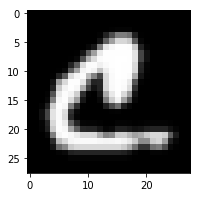

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo

clf=RandomForestClassifier(n_estimators=100,oob_score=True,verbose=0,n_jobs=-1)
clf.fit(X_train,y_train)


# 10 Variables más importantes visualizadas usando como ejemplo la imagen de X_train[0]

importancias=clf.feature_importances_
indices=np.argsort(importancias)[::-1]

fig, ax = plt.subplots(1, 1, figsize=(3,3))

for f in range(10):
    print("%d. Variable %d (%f)" % (f + 1, indices[f], importancias[indices[f]]))
    ax.imshow(images[X_train[0,indices[f]]].reshape(28, 28).transpose(), cmap="gray")

print()    
print("Visualizamos las 10 variables de la imagen :", labels_text[y_train[0]])



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Te parece plausible el resultado que has obtenido? Porqué?
</div>

Es dificil poder definir solo con las 10 variables la imagen con precisión como se ve en la visualización, para el clasificador las variables más importantes parece que marcan el contorno de la letra. 
Se podrían ir añadiendo más variables en el bucle para ir visualizando la imagen hasta determinar cuando se puede clasificar bien, y de esa forma determinar el numero de variables adecuado para entrenar el modelo (sería interesante en el caso de tener dataset con muchas imagenes se podría reducir capacidad de computo ajustando el numero de variables importantes con las que entrenar). 

### 1.1.5 Número de clasificadores (1 punto)

En los ejercicios anteriores hemos combinado 100 clasificadores simples en nuestro clasificador combinado. Será que la precisión del clasificador combinado aumenta indefinidamente su desempeño si añadimos más clasificadores?

Para responder a esta pregunta vamos a representar una curva de validación. La curva de validación es una representación gráfica del desempeño de un modelo variando uno de sus parámetros. Mientras que la búsqueda de rejilla nos permite encontrar la combinación de parámetros que da mejores resultados, la curva de validación nos permite entender cuál es el impacto de un determinado parámetro en el desempeño de un modelo.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Entrena varios modelos de *Random Forest* con un número de árboles cada vez mayor. Para cada modelo, calcula su precisón en el conjunto de test o usando *cross-validation* en el conjunto de entrenamiento. Opcional: representa gráficamente la evolución de la precisión con el número de árboles para ayudarte en el análisis de los resultados.
<hr>
Sugerencia: usar el módulo *validation_curve* de sklearn. Para aprender a usar este módulo os recomendamos los siguientes enlaces:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html<br>
http://scikit-learn.org/stable/modules/learning_curve.html#validation-curve
</div>

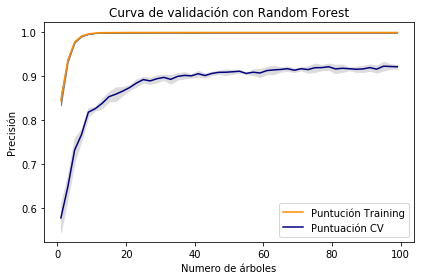

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# crear rango para los valores que tomarán los clasificadores
param_range=np.arange(1,100,2)

# Calcular precisión en training y test usando el rango de valores para los parámetros
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train_pca, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

# Calcular media y desv. estandar para las puntuciones de training
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calcular media y desv. estandar para las puntuciones de test
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Visualizar precisión media para conjuntos training y test 
plt.plot(param_range, train_mean, label="Puntución Training", color="darkorange")
plt.plot(param_range, test_mean, label="Puntuación CV", color="navy")

# Visualizar bandas de precisión para conjuntos training y test
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Crear gráfico
plt.title("Curva de validación con Random Forest")
plt.xlabel("Numero de árboles")
plt.ylabel("Precisión")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Incrementa indefinidamente la precisión con el número de árboles combinados? Si satura, lo hace a la precisión máxima o a otro valor? Porqué?
</div>

No, como se puede ver en la gráfica de puntuación de CV, a partir de los 30 árboles aprox. el modelo satura con una precisión del 90%, es probable que los árboles más profundos hayan sobreentrenado a partir de ahí en el training set. 
Para una mayor precisión , es más importante la diversidad de los clasificadores base que su número, y para eso el training set tiene que ser suficientemente grande y diverso con alta grado de aleatoriedad en el proceso de muestreo. 

### 1.1.6 Volumen de datos (1 punto)

Será que entrenando el modelo con más datos (más imágenes) el modelo aprendería a clasificar con mejor precisión? Es muy útil intentar responder a esta pregunta antes de lanzarse a conseguir más datos, ya que este puede ser un proceso difícil, caro, o que implique esperar mucho tiempo.

Para responder a esta pregunta, analizaremos cómo evoluciona la precisión del modelo en los conjuntos de entrenamiento y test para diferentes volúmenes de datos de creciente tamaño. Representar los resultados en una curva de aprendizaje (*learning curve*) nos permitirá analizar visualmente estas cantidades.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Entrena varios modelos de *Random Forest* con un volumen de datos cada vez mayor. Para cada modelo, calcula su precisón en el conjunto de entrenamiento y de test, y representa los resutados en un gráfico.
<hr>
Sugerencia: usar el módulo *learning_curve* de sklearn. Para aprender a usar este módulo os recomendamos los siguientes enlaces:<br>
http://scikit-learn.org/stable/modules/learning_curve.html#learning-curve<br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
</div>

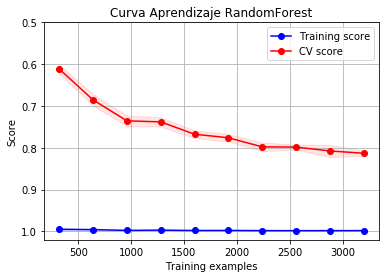

In [14]:
from sklearn.learning_curve import learning_curve

# Calcular precisión en training y test usando el rango de valores para los parámetros
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train_pca, 
                                                        y_train,
                                                        cv=5, 
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(.1, 1., 10),
                                                        verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="CV score")


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")


plt.title("Curva Aprendizaje RandomForest")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.5, 1.02))
plt.grid()
plt.gca().invert_yaxis()
plt.show()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Crees que si obtuviésemos más datos de entrenamiento (más imágines clasificadas) mejoraría el modelo? Porqué?
</div>

Si, como se ve el training score, llegados al máximo de datos de entrenamiento, es mayor que el CV score y todavía no convergen, por lo tanto con mas imagenes clasificadas en el training set, el CV score del modelo podría incrementarse, seguramente los árboles alcanzarían mayor profundidad.

ref. https://followthedata.files.wordpress.com/2012/06/screen-shot-2012-06-02-at-21-30-03.png

## 1.2 Boosting (1 punto)

En el sistema de *Boosting* se combinan vários clasificadores débiles sequencialmente, y en cada uno de ellos se da más peso a los datos que han sido erróneamente clasificados en las combinaciones anteriores, para que se concentre así en los casos más difíciles de resolver.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Usando el conjunto *X_train_pca*, entrena un modelo Gradient Boosting y estima la precisión del modelo con una estrategia de *cross-validation* en los mismos conjuntos. Seguidamente calcula las previsiones del modelo en el conjunto *X_test_pca* y su precisión en este conjunto.

<hr>
Sugerencia: usar los módulos *GradientBoostingClassifier* y *cross_val_score* de sklearn. Para aprender a usar este módulo os recomendamos el siguientes enlace:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
</div>

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier(n_estimators=100,verbose=0)
print(clf)
print()


# Precisión con CV 

puntuaciones=cross_val_score(clf,X_train_pca,y_train,cv=5)
print ("Precisión con CV :", np.mean(puntuaciones))


# Precisión con el conjunto de test

clf.fit(X_train_pca,y_train)
outlabels=clf.predict(X_test_pca)

precision=accuracy_score(y_test,outlabels)
print("Precisión conjunto X_test_pca: ",precision)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Precisión con CV : 0.9155
Precisión conjunto X_test_pca:  0.925


In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test, outlabels))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       200
          1       0.89      0.86      0.87       200
          2       0.96      0.96      0.96       200
          3       0.95      0.93      0.94       200
          4       0.90      0.92      0.91       200

avg / total       0.92      0.93      0.92      1000



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> El boosting se basa en la combinación de clasificadores débiles. En la implementación que utilizaste en este ejercicio, cuál es la profundidad de los árboles utilizados? Compárala con la que utilizaste en los árboles de decisión del ejercicio de *bagging*.
</div>

La profundidad de los árboles lo define el parámetro max_depth, en este caso se a ejecutado el clasificador con todos los parámetros por defecto (y max_depth=3), pero se podría utilizar por ejemplo GridsearchCV para optimizar diferentes parámetros (number of trees, tree depth y learning rate) que suelen ser relevantes en la precisión de este clasificador (ref. https://machinelearningmastery.com/configure-gradient-boosting-algorithm/)

En el caso del clasificador RF utilizado en el ejercicio de bagging, max_depth=None por lo tanto los nodos se expanden hasta que todas las hojas sean puras o tengan menos de min_samples_split (que era =2). 


# 2. Combinación secuencial de clasificadores base diferentes

## 2.1 Stacking (1 punto)

Un clasificador de *stacking* usa como atributos las predicciones hechas por otros clasificadores en lugar de los datos originales de entrada.

Para construir nuestro clasificador de *stacking* vamos a usar las predicciones hechas en el conjunto de test por los clasificadores utilizados en los ejercicios anteriores de esta PEC, así como de otros clasificadores. Os proporcionamos las predicciones hechas sobre el mismo conjunto de test por clasificadores K-Nearest neighbors Classifier (knc), Support Vector Machines Classifier (svmc) y Neural Network Classifier (nnc) en archivos adjuntos. Estas predicciones se pueden cargar con el siguiente código: 

In [6]:
# carga de predicciones calculadas con otros clasificadores:
preds_knc = np.load("preds_knc.pickle")
preds_svmc = np.load("preds_svmc.pickle")
preds_nnc = np.load("preds_nnc.pickle")

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Construye un clasificador de *stacking* usando una *Random Forest* que use como atributos a las predicciones hechas en el conjunto de test por los algoritmos k-nn, SVM, red neuronal y  Gradient Boosting. Calcula la precisión del modelo resultante con *cross-validation* en el conjunto de test.

<hr>
Sugerencia: usar las funciones column_stack de numpy y OneHotEncoder de sklearn para preparar los datos. Para aprender a usar estas funciones  os recomendamos los siguientes enlaces:<br>
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.column_stack.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html<br>
http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features
</div>

In [8]:
# Preparar datos 

from sklearn.preprocessing import OneHotEncoder

preds_GB=outlabels
matriz_preds=np.column_stack((preds_knc,preds_svmc,preds_nnc,preds_GB))
enc=OneHotEncoder()
stacking_array=enc.fit_transform(matriz_preds).toarray()



# Clasificador stacking

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf=RandomForestClassifier(n_estimators=100,verbose=0,n_jobs=-1)
print(clf)
print()

# CV con 10 Folds
puntuaciones=cross_val_score(clf,stacking_array,y_test,cv=10)

print ("Precisión modelo stacking :", np.mean(puntuaciones))




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Precisión modelo stacking : 0.964


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Has conseguido mejorar la precisión gracias al *stacking*? Comenta el resultado.
</div>

Si, respecto al mismo modelo RF del apartado 1.1.1 (0.9275) se ha mejorado la precisión casi un 4%, usando las predicciones de los 4 clasificadores sobre conjunto de test, se ha creado un array con datos preparados (codificados) que se ha utilizado como datos de entrada del modelo de stacking, mejorando resultados sobre conjunto test con CV. 

## 2.2 Cascading

### 2.2.1 Cascading simple

El caso de *cascading* es parecido al de *stacking* pero utilizando no solamente las predicciones parciales de los clasificadores base, sino también los datos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Construye un clasificador de *cascading* usando una *Random Forest* que use como atributos a las predicciones hechas en el conjunto de test por los algoritmos k-nn, SVM, red neuronal y  Gradient Boosting, así como también las variables originales. Calcula la precisión del modelo resultante con *cross-validation* en el conjunto de test.

<hr>
Sugerencia: Usa el mismo conjunto de datos que en el ejercicio anterior pero añade el conjunto de test original *X_test_pca*.

In [24]:
# Preparar datos de entrada para modelo cascading
cascading_input=np.hstack((stacking_array,X_test_pca))
print("Dimensión del conjunto Cascading : " , cascading_input.shape)
print()

# Clasificador Cascading

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf=RandomForestClassifier(n_estimators=100,verbose=0,n_jobs=-1)
print(clf)
print()

# CV con 10 Folds
puntuaciones=cross_val_score(clf,cascading_input,y_test,cv=10)

print ("Precisión modelo cascading :", np.mean(puntuaciones))




Dimensión del conjunto Cascading :  (1000, 120)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Precisión modelo cascading : 0.968


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Has conseguido mejorar la precisión gracias al *cascading*? Comenta el resultado.
</div>

Se obtiene la misma precisión prácticamante ( 0.964 vs 0.968), en este caso el añadir los datos del conjunto test a las predicciones no hace que el modelo generalice mejor, comete practicamente los mismos errores sobre las predicciónes del conjunto test.

### 2.2.2 Cascading con variables adicionales (1 punto)

En el *cascading* también podemos añadir como variables del modelo a datos adicionales que se hayan podido generar durante la toma de decisiones de los clasificadores que combinamos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Qué datos adicionales de los modelos anteriores podrías usar para enriquecer al modelo? Construye un clasificador de *cascading* usando una *Random Forest* que use como atributos a los usados en el ejercicio anterior más otros que puedas obtener de algunos de los clasificadores utilizados en los ejercicios anteriores. Calcula la precisión del modelo resultante con *cross-validation* en el conjunto de test.

In [43]:
# Cargar las probabilidades por cada clase de otros clasificadores recogidos (K-nn, SVM)

probs_svmc=np.load("probs_svmc.pickle")
probs_knc=np.load("probs_knc.pickle")

# Añadir estas probabilidades de cada clase al conjunto cascading anterior + probabilidades 1.1.3

cascading_var_input=np.hstack((stacking_array,X_test_pca,probs_svmc,probs_knc,probabilidades))


# Clasificador Cascading con variables adicionales

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf=RandomForestClassifier(n_estimators=100,verbose=0,n_jobs=-1)
print(clf)
print()

# CV con 10 Folds
puntuaciones=cross_val_score(clf,cascading_var_input,y_test,cv=10)

print ("Precisión modelo cascading con variables:", np.mean(puntuaciones))




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Precisión modelo cascading con variables: 0.97


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Has conseguido mejorar la precisión gracias a añadir datos adicionales al *stacking*? Comenta el resultado.
</div>

Los resultados son similares añadiendo nuevas variables, apenas hemos logrado mayor precisión ejecutando varias veces el modelo y jugando con la combinación de los diferentes atributos externos. 

Se podría intentar entrenar el modelo Random Forest del 1. usando las variables con mayor importancia para ver si se obtiene mayor precisión , o en el mejor de los casos incrementar en training set con más imagenes clasificadas.